In [10]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from pylab import rcParams
from matplotlib.pyplot import figure
from sklearn.impute import KNNImputer
 
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

from matplotlib import colors
from sklearn.feature_selection import SelectKBest

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from collections import Counter
from sklearn.naive_bayes import GaussianNB

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

In [12]:
path_dataset1 = '..\\datosTransformados\\datamining_modelado\\'
df = pd.read_csv(path_dataset1 + 'datamining_modelados.csv', index_col= [0])
df.head()

,user_id,mdl_user_id,nota_media_curso,num_cursos,num_actividades,nota_media_actividades,num_programas,frecuencia_media_acceso_mensual
0,3.0,13.0,0.666667,15.0,3,10.000000,3,1.000000
1,4.0,14.0,4.091000,10.0,46,7.882088,3,3.435001
2,5.0,15.0,2.222222,9.0,44,8.575606,2,3.435001
3,7.0,18.0,3.858000,5.0,44,8.031091,1,3.435001
4,8.0,19.0,2.914000,5.0,39,8.286821,1,3.435001


#### FINALIDAD DE ESTE NOTEBOOK 

#### PREPARACION DE DATOS


In [13]:
df_exito = df[df['nota_media_curso']>=5]
df_exito['resultado']= 1

df_fracaso = df[df['nota_media_curso']<5]
df_fracaso['resultado']= 0

data = df_exito.append(df_fracaso)
data

<ipython-input-13-8409011fd0dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exito['resultado']= 1
<ipython-input-13-8409011fd0dc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fracaso['resultado']= 0


,user_id,mdl_user_id,nota_media_curso,num_cursos,num_actividades,nota_media_actividades,num_programas,frecuencia_media_acceso_mensual,resultado
33,129.0,148.0,5.672857,7.0,3,8.763272,2,6.5,1
38,152.0,197.0,8.790000,1.0,12,8.789091,1,12.0,1
39,153.0,198.0,8.890000,1.0,12,8.889091,1,9.5,1
40,154.0,199.0,9.080000,1.0,12,9.076364,1,11.5,1
41,155.0,200.0,9.140000,1.0,12,9.138182,1,3.0,1
...,...,...,...,...,...,...,...,...,...
168,418.0,439.0,3.097778,18.0,22,9.293333,1,1.0,0
169,419.0,440.0,3.070000,18.0,22,9.210000,1,1.0,0
170,420.0,441.0,2.585000,18.0,19,9.306000,1,2.0,0
171,421.0,442.0,2.754444,18.0,18,9.916000,1,2.0,0


#### VISUALIZACION DE DATOS

In [14]:
data.groupby('resultado').size()
#Esto son 129 de los alumnos no han tenido exito y 44si

resultado
0    129
1     44
dtype: int64

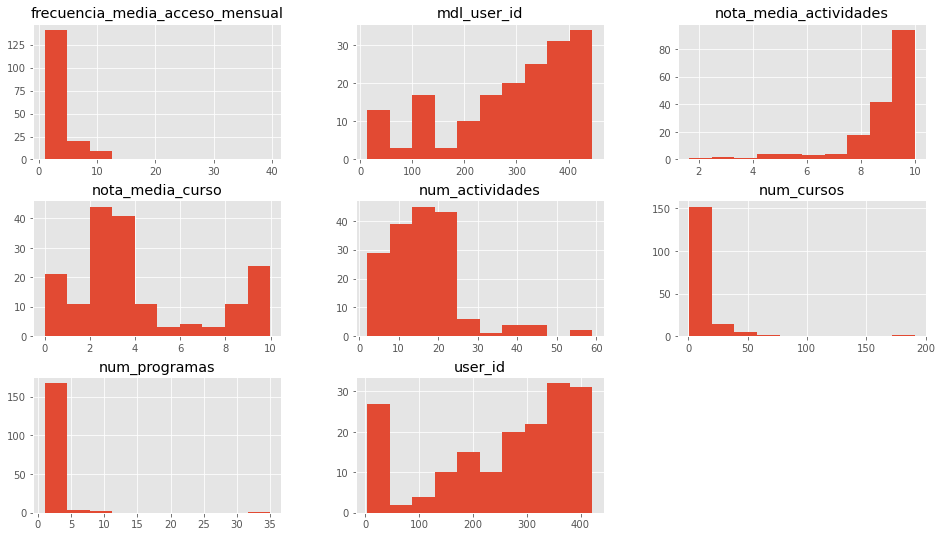

In [15]:
data.drop(['resultado'], axis=1).hist()
plt.show()

# NAIVE BAYES

#### SELECCION DE COLUMNAS


In [16]:
X=data.drop(['resultado'], axis=1)
y=data['resultado']

best=SelectKBest(k=6)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['nota_media_curso', 'num_cursos', 'num_actividades',
       'nota_media_actividades', 'num_programas',
       'frecuencia_media_acceso_mensual'],
      dtype='object')


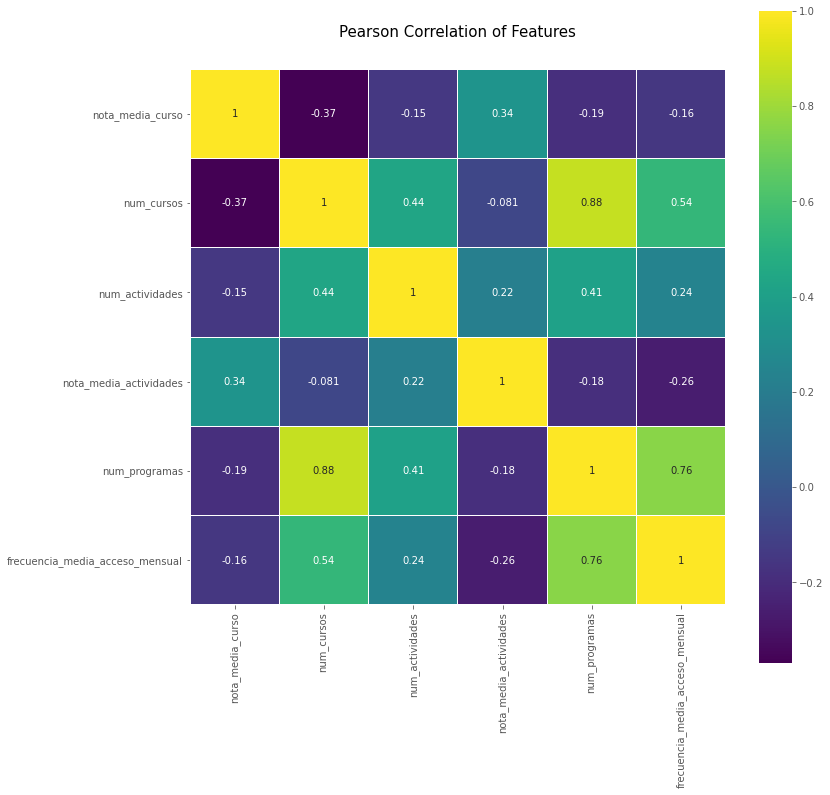

In [17]:
#Correlacion de las columnas seleccionadas para la clasificacion
used_features =X.columns[selected]

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(data[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

#### CREACION MODELO NB

In [18]:
# Primero se dividen los datos en entrenamiento y test.

X_train, X_test = train_test_split(data, test_size=0.2, random_state=6) 
y_train =X_train["resultado"]
y_test = X_test["resultado"]

In [19]:
#Se crea el modelo, lo ponemos a aprender con fit() y se obtienen predicciones sobre el conjunto de test.

# Instanciar el clasificador
gnb = GaussianNB()
# Entrenar el clasificador
gnb.fit(
    X_train[used_features].values,
    y_train
)
y_pred = gnb.predict(X_test[used_features])


#### VALIDACION RESULTADOS

In [20]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train[used_features], y_train)))
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X_test[used_features], y_test)))

Precisión en el set de Entrenamiento: 0.99
Precisión en el set de Test: 0.97


In [21]:
#Se observa el reporte de clasificación con nuestro conjunto de Validación.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.89      0.94         9

    accuracy                           0.97        35
   macro avg       0.98      0.94      0.96        35
weighted avg       0.97      0.97      0.97        35



In [22]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print(cm)
print(ac)

[[26  0]
 [ 1  8]]
0.9714285714285714


#### PRUEBA DEL MODELO: ¿EXITO o FRACASO?
 

In [23]:
#                ['nota_media_curso','num_cursos','num_actividades','nota_media_actividades',''num_programas','frecuencia_media_acceso_mensual'']
print(gnb.predict([[5,                    30,                 20,                    6,             5,              10],
                   [7,                    10,                 28,                    6,             3,               8]]))
#Resultado esperado 0-Fracaso, 1-Exito

[0 0]


#  REGRESION LOGISTICA 

In [24]:
#Observar el dataset que se va a utilizar
data.head()

,user_id,mdl_user_id,nota_media_curso,num_cursos,num_actividades,nota_media_actividades,num_programas,frecuencia_media_acceso_mensual,resultado
33,129.0,148.0,5.672857,7.0,3,8.763272,2,6.5,1
38,152.0,197.0,8.790000,1.0,12,8.789091,1,12.0,1
39,153.0,198.0,8.890000,1.0,12,8.889091,1,9.5,1
40,154.0,199.0,9.080000,1.0,12,9.076364,1,11.5,1
41,155.0,200.0,9.140000,1.0,12,9.138182,1,3.0,1


#### VISUALIZACION 

In [25]:
# Veamos qué cantidad de muestras de comprar o alquilar tenemos:
data.groupby('resultado').size()
#Esto son 129 de los alumnos no han tenido exito y 44si

resultado
0    129
1     44
dtype: int64

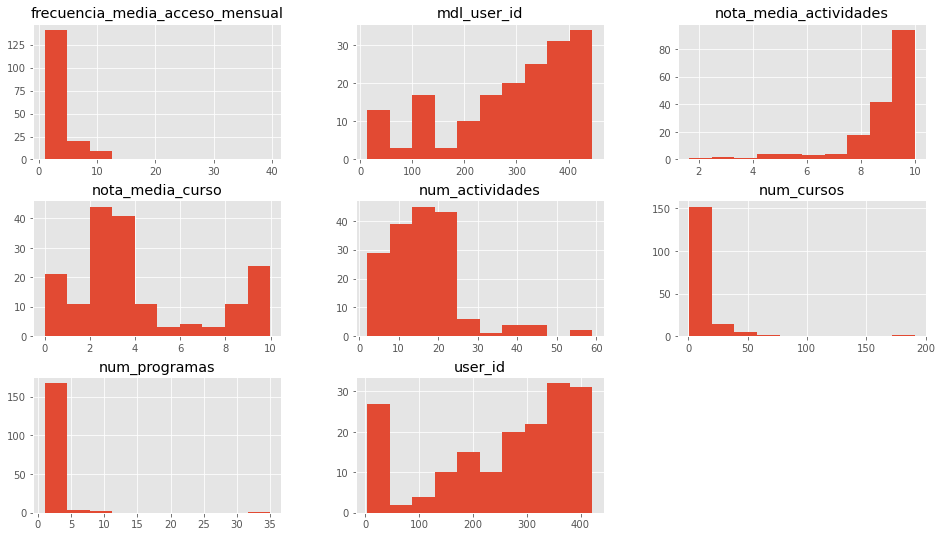

In [26]:
data.drop(['resultado'],1).hist()
plt.show()

#### CREACION MODELO REGRESION LOGISTICA

In [27]:
X=data.drop(['resultado'], axis=1)
Y=data.resultado

In [28]:
model = LogisticRegression()

#Entreno el modelo
model.fit(X, Y)

#Realizo una predicción
predict = model.predict(X)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
#Una vez compilado nuestro modelo, le hacemos clasificar todo nuestro conjunto de entradas X utilizando el método 
#“predict(X)” y revisamos algunas de sus salidas y vemos que coincide con las salidas reales de nuestro archivo csv.
predictions = model.predict(X)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [21]:
model.score(X,y)
#Se obtiene un score de 99%, sin embargo no se han dividio los datos en test y train. Por lo que en la validacion,
#para que el modelo sea real, se dividiran los datos

0.9942196531791907

#### VALIDACION 

In [30]:
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [31]:
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))

1.0


In [32]:
matriz = confusion_matrix(Y_test, predictions)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[31  0]
 [ 0  4]]


In [33]:
#Se observa el reporte de clasificación con nuestro conjunto de Validación.
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00         4

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



In [34]:
#Calculo el Puntaje F1 del modelo
puntajef1 = f1_score(Y_test, predictions)
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
1.0


In [35]:
#Calculo la curva ROC - AUC del modelo
roc_auc = roc_auc_score(Y_test, predictions)
print('Curva ROC - AUC del modelo:')
print(roc_auc)

Curva ROC - AUC del modelo:
1.0


#### PRUEBA DEL MODELO: ¿EXITO o FRACASO?


In [36]:
#                ['user_id','mdl_user_id',nota_media_curso','num_cursos','num_actividades','nota_media_actividades',''num_programas','frecuencia_media_acceso_mensual'']
print(model.predict([[200,        500,         5,             30,                 20,                    6,             5,              10],
                   [201,          501,         6,               10,                 28,                    6,             3,               8]]))
#Resultado esperado 0-Fracaso, 1-Exito

[0 0]


In [37]:
#Mencionar que los datos insertados son los mismos que se han insertado en el modelo Naive Bayes y las predicciones son iguales. 
#Fracaso para los dos usuarios.

# BALANCEO DE DATOS 

##### PERO... 

In [38]:
#Veamos de cuantas filas tenemos y cuantas hay de cada clase:

print(data.shape)
print(pd.value_counts(data['resultado'], sort = True))

(173, 9)
0    129
1     44
Name: resultado, dtype: int64


In [39]:
target_labels = np.unique(data["resultado"])
c_train = Counter(data["resultado"])
c_train

imb_rate = 44 / 173
print("The imbalance is " + str(imb_rate) + " to 1.")

The imbalance is 0.2543352601156069 to 1.


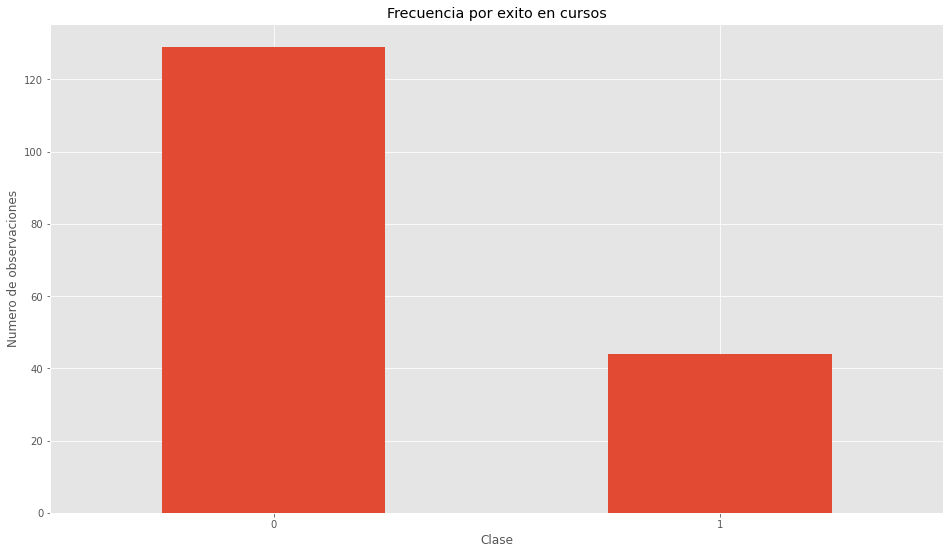

In [40]:
count_classes = pd.value_counts(data['resultado'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Frecuencia por exito en cursos")
plt.xlabel("Clase")
plt.ylabel("Numero de observaciones");

#### BALANCEO DE DATOS 

#### Estrategia oversampling clase minoritaria (SMOTE)
 

In [41]:
#Estrategia oversampling clase minoritaria
print("Antes del OverSampling, numero de label '1': {}".format(sum(Y_train == 1)))
print("Antes del OverSampling, numero de label '0': {} \n".format(sum(Y_train == 0)))

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, Y_train.ravel())
  
print("Despues de OverSampling, numero de label'1': {}".format(sum(y_train_res == 1)))
print("Despues de OverSampling, numero de label '0': {}".format(sum(y_train_res == 0)))

Antes del OverSampling, numero de label '1': 40
Antes del OverSampling, numero de label '0': 98 

Despues de OverSampling, numero de label'1': 98
Despues de OverSampling, numero de label '0': 98


In [42]:
lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test)
  
# print classification report
print(classification_report(Y_test, predictions))
#print accuracy
print(accuracy_score(Y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00         4

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35

1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Undersampling en la clase mayoritaria (NEAR MISS)

 

In [43]:
#Undersampling en la clase mayoritaria (NEAR MISS)

print("Before Undersampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(Y_train == 0)))
  
# apply near miss
nr = NearMiss()
  
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel())
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 40
Before Undersampling, counts of label '0': 98 

After Undersampling, counts of label '1': 35
After Undersampling, counts of label '0': 35


In [44]:
# train the model on train set
lr2 = LogisticRegression()
lr2.fit(X_train_miss, y_train_miss.ravel())
predictions = lr2.predict(X_test)
  
# print classification report
print(classification_report(Y_test, predictions))
#print accuracy
print(accuracy_score(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.45      0.61        31
           1       0.15      0.75      0.25         4

    accuracy                           0.49        35
   macro avg       0.54      0.60      0.43        35
weighted avg       0.84      0.49      0.57        35

0.4857142857142857


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### CONCLUSIONES 

# REGRESION LINEAL MULTIPLE 

In [46]:
#Carga del dataset inventado
df_multiple = pd.read_csv(path_dataset1 + 'datos_inventados.csv')
df_multiple.head()


,usuario,presupuesto_formacion,sueldo,años_trabajand,edad,sexo,km_hogar_trabajo,experiencia_docente,categoria_curso,sitio_trabajo,nota_media_actividades,num_actividades,accesos,tiempo_empleado,formato_curso,rating,nota_curso
0,1,80,1567,15,55,M,6,15,FUNCIONAMIENTO INTERNO,Bergara,4,21,11,9,1,4,4
1,2,60,1697,13,51,M,47,30,POLIVALENCIA FUSION-MOLDEO,Aretxabaleta,6,13,7,11,1,4,8
2,3,117,1855,4,37,M,76,10,MANTENIMIENTO,Arrasate,9,6,9,4,0,5,8
3,4,186,1886,14,48,M,0,15,PROCESO + HERRAMENTAL,Bergara,4,20,6,19,1,0,2
4,5,198,1740,18,47,M,16,15,CONTROL VISUAL,Aretxabaleta,5,13,8,14,1,1,9


In [47]:
#Identificar variables categoricas y variables numericas
Cat_vars = []
Num_vars = []

for col in list(df_multiple.columns):
    
    if ((df_multiple[col].dtype == 'float64') | (df_multiple[col].dtype == 'int64')):
        
        Num_vars.append(col)
    
    else: Cat_vars.append(col)
        
print(Cat_vars)
print(Num_vars)

['sexo', 'categoria_curso', 'sitio_trabajo']
['usuario', 'presupuesto_formacion', 'sueldo', 'años_trabajand', 'edad', 'km_hogar_trabajo', 'experiencia_docente', 'nota_media_actividades', 'num_actividades', 'accesos', 'tiempo_empleado', 'formato_curso', 'rating', 'nota_curso']


In [48]:
data_multiple= pd.concat([pd.get_dummies(df_multiple[['categoria_curso', 'sitio_trabajo','sexo']].astype(object), drop_first = True), 
              df_multiple[['presupuesto_formacion', 'sueldo','años_trabajand','edad','km_hogar_trabajo','experiencia_docente',
                          'nota_media_actividades','num_actividades','accesos','tiempo_empleado','formato_curso','rating']]],
              axis = 1, join = 'outer', ignore_index = False)

In [49]:
XY_train = np.array(data_multiple)
z_train = df_multiple['nota_curso'].values

In [50]:
# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()
 
# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)
 
# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)
 
# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [-7.57535555e-01 -2.54890626e+00  9.07408173e-01 -1.42418489e+00
  2.24238147e+00 -2.65882366e+00 -2.47414955e-01  2.57301394e+00
  2.96107789e-03 -1.80147590e-01  1.93517211e-03  1.03156638e-03
  1.07916628e-01  1.60808662e-02 -1.63664559e-03 -3.13627413e-02
  8.70608698e-02  4.28358790e-02 -1.83646907e-01 -4.49689859e-02
 -4.94539734e-01 -1.27173896e-01]
Mean squared error: 2.59
Variance score: 0.55


In [51]:
#Se incorpora un nuevo usuario y se predice la nota. Para ello, se incorporan los datos de este nuevo usuario.
nota_nuevo_usuario = regr2.predict([[0,0,0,0,0,0,1,0,1,1,86,1700,7,47,17,15,8,20,11,15,1,2]])
print(int(nota_nuevo_usuario))

4
